In [24]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
from math import sqrt
import seaborn as sns

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [10]:
boston_df.tail()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0
505,505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,7.88,11.9


·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

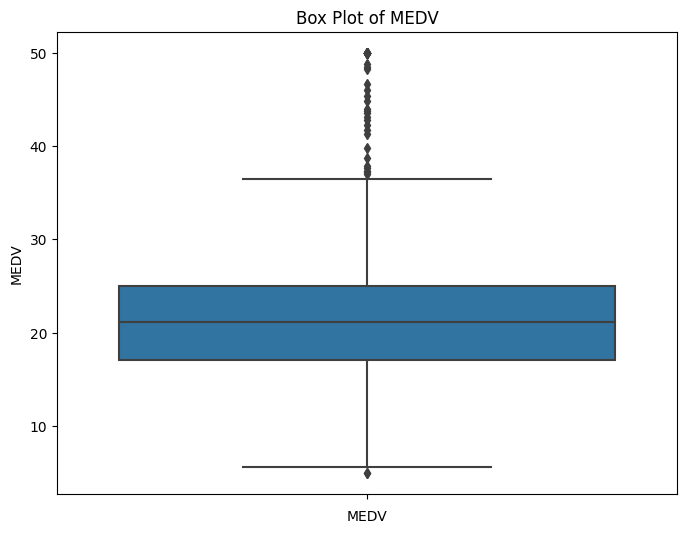

In [6]:
data = boston_df['MEDV']

plt.figure(figsize=(8, 6))
sns.boxplot(y=data)
plt.title('Box Plot of MEDV')
plt.xlabel('MEDV')
plt.show()

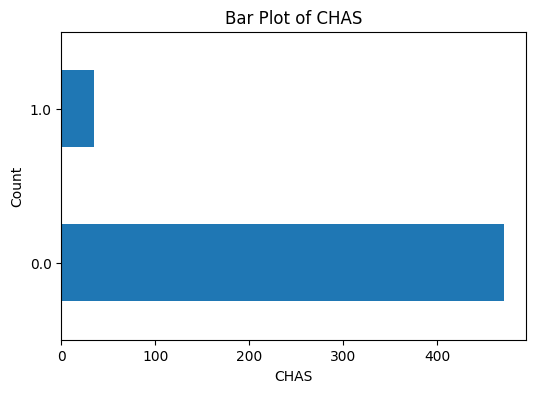

In [12]:

data = boston_df['CHAS']

# Group by and count occurrences
grouped_data = data.value_counts()

# Create a bar plot
plt.figure(figsize=(6, 4))
grouped_data.plot(kind='barh')
plt.title('Bar Plot of CHAS')
plt.xlabel('CHAS')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()



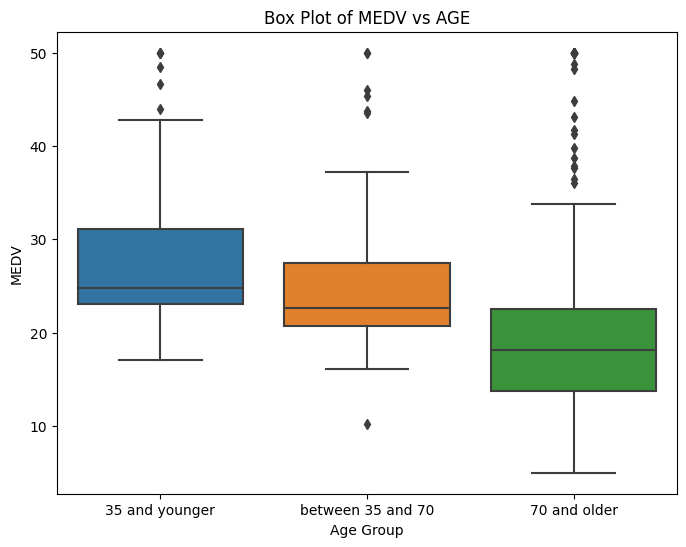

In [13]:



boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, float('inf')], labels=['35 and younger', 'between 35 and 70', '70 and older'])

# Create a box plot using seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x='AGE_Group', y='MEDV', data=boston_df)
plt.title('Box Plot of MEDV vs AGE')
plt.xlabel('Age Group')
plt.ylabel('MEDV')
plt.show()


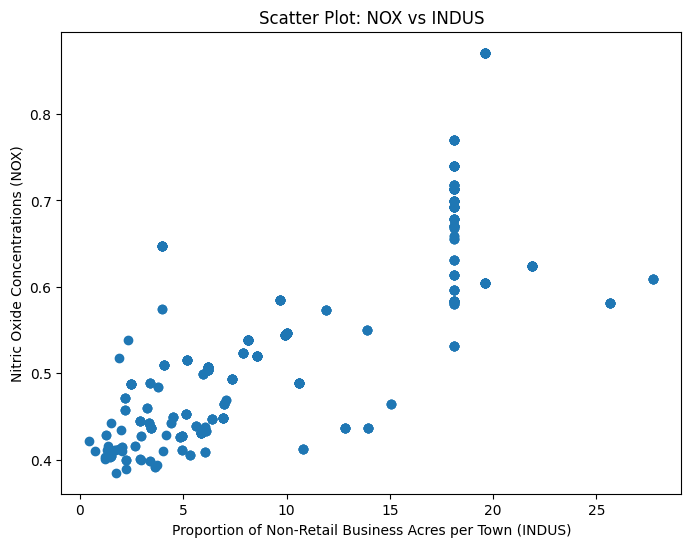

In [14]:

plt.figure(figsize=(8, 6))
plt.scatter(boston_df['INDUS'], boston_df['NOX'])
plt.title('Scatter Plot: NOX vs INDUS')
plt.xlabel('Proportion of Non-Retail Business Acres per Town (INDUS)')
plt.ylabel('Nitric Oxide Concentrations (NOX)')
plt.show()


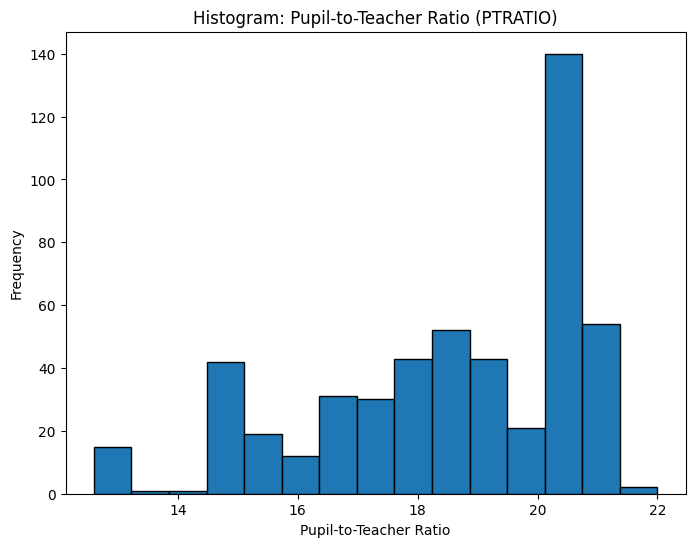

In [15]:

plt.figure(figsize=(8, 6))
plt.hist(boston_df['PTRATIO'], bins=15, edgecolor='black')  # Adjust 'bins' as needed
plt.title('Histogram: Pupil-to-Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil-to-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()


In [18]:

group_by_chas = boston_df.groupby('CHAS')

chas_bounded = group_by_chas.get_group(1)['MEDV']
not_chas_bounded = group_by_chas.get_group(0)['MEDV']

# Perform t-test
t_statistic, p_value = stats.ttest_ind(chas_bounded, not_chas_bounded)

# Print results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in median values.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in median values.")


T-Statistic: 3.996437466090509
P-Value: 7.390623170519905e-05
Reject the null hypothesis: There is a significant difference in median values.


In [19]:
group_by_age = boston_df.groupby('AGE')

age_groups = []
for name, group in group_by_age:
    age_groups.append(group['MEDV'])

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(*age_groups)

# Print results
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in median values.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in median values.")

F-Statistic: 0.9840091646131598
P-Value: 0.5539698276810188
Fail to reject the null hypothesis: There is no significant difference in median values.


In [26]:
corr_coefficient, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print("Pearson Correlation Coefficient:", corr_coefficient)
print("P-Value:", p_value)

alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant relationship.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship.")


Pearson Correlation Coefficient: 0.7636514469209157
P-Value: 7.91336106123623e-98
Reject the null hypothesis: There is a significant relationship.


In [25]:
X = boston_df[['DIS']]  # Predictor variable: weighted distance
X = sm.add_constant(X)   # Add constant term for intercept

y = boston_df['MEDV']    # Outcome variable: median value

# Create and fit the regression model
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           1.21e-08
Time:                        21:16:55   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0